https://www.kaggle.com/code/shahules/getting-started-with-cnn-and-vgg16

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
!unzip -qq "/content/gdrive/MyDrive/aerial-cactus-identification.zip"

In [3]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os,cv2
from IPython.display import Image
from keras.preprocessing import image
from keras import optimizers
from keras import layers,models
from keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt
import seaborn as sns
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

In [4]:
import numpy as np

In [5]:
!unzip -qq "/content/test.zip"
!unzip -qq "/content/train.zip"

In [6]:
train_dir="../input/train/train"
test_dir="../input/test/test"
train=pd.read_csv('/content/train.csv')

df_test=pd.read_csv('/content/sample_submission.csv')

In [7]:
train.head(5)

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [8]:
train.has_cactus=train.has_cactus.astype(str)

In [9]:
train

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1
...,...,...
17495,ffede47a74e47a5930f81c0b6896479e.jpg,0
17496,ffef6382a50d23251d4bc05519c91037.jpg,1
17497,fff059ecc91b30be5745e8b81111dc7b.jpg,1
17498,fff43acb3b7a23edcc4ae937be2b7522.jpg,0


In [10]:
print('out dataset has {} rows and {} columns'.format(train.shape[0],train.shape[1]))

out dataset has 17500 rows and 2 columns


In [11]:
train['has_cactus'].value_counts()

1    13136
0     4364
Name: has_cactus, dtype: int64

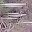

In [12]:
Image(os.path.join("/content/train",train.iloc[0,0]),width=250,height=250)

In [13]:
datagen = ImageDataGenerator(rescale=1/255)
batch_size=150

flow_from_dataframe는 Keras에서 제공하는 데이터 생성기(data generator) 중 하나입니다. 데이터프레임을 입력으로 받아서 이미지 데이터를 로드하고, 데이터 증강(augmentation)과 전처리(preprocessing)를 수행한 후 배치(batch) 단위로 모델에 입력 데이터를 제공합니다. 

target_size가 resize될 크기를 의미한다.

In [14]:
train_generator = datagen.flow_from_dataframe(dataframe=train[:15001], directory="/content/train",x_col='id',y_col='has_cactus', class_mode='binary', batch_size=batch_size,target_size=(150,150))

Found 15001 validated image filenames belonging to 2 classes.


In [15]:
validation_generator = datagen.flow_from_dataframe(dataframe=train[15000:], directory="/content/train", x_col='id', y_col='has_cactus', class_mode='binary', batch_size=50, target_size=(150,150))

Found 2500 validated image filenames belonging to 2 classes.


Found 0 validated image filenames belonging to 0 classes.
/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 15001 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  warnings.warn(

오류 발생
----> 경로를 수정하니까 문제가 해결

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [18]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(), metrics=['acc'])

In [19]:
epochs=10
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=10,validation_data=validation_generator,validation_steps=50)

<ipython-input-19-aa8015a7d50f>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=10,validation_data=validation_generator,validation_steps=50)


Epoch 1/10
100/100 [==============================] - 33s 225ms/step - loss: 0.3761 - acc: 0.8302 - val_loss: 0.2786 - val_acc: 0.8896
Epoch 2/10
100/100 [==============================] - 21s 210ms/step - loss: 0.1951 - acc: 0.9217 - val_loss: 0.1263 - val_acc: 0.9464
Epoch 3/10
100/100 [==============================] - 21s 205ms/step - loss: 0.1359 - acc: 0.9451 - val_loss: 0.0991 - val_acc: 0.9628
Epoch 4/10
100/100 [==============================] - 20s 199ms/step - loss: 0.1153 - acc: 0.9544 - val_loss: 0.1154 - val_acc: 0.9552
Epoch 5/10
100/100 [==============================] - 21s 209ms/step - loss: 0.0915 - acc: 0.9646 - val_loss: 0.0921 - val_acc: 0.9688
Epoch 6/10
100/100 [==============================] - 20s 200ms/step - loss: 0.1113 - acc: 0.9677 - val_loss: 0.0773 - val_acc: 0.9764
Epoch 7/10
100/100 [==============================] - 24s 235ms/step - loss: 0.0802 - acc: 0.9690 - val_loss: 0.0871 - val_acc: 0.9664
Epoch 8/10
100/100 [==============================] - 2

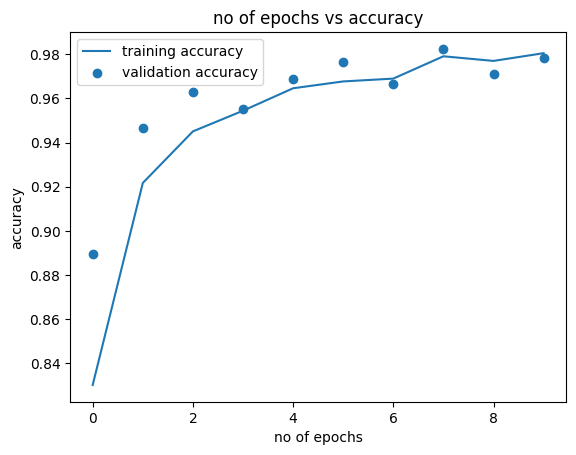

In [20]:
acc=history.history['acc']  ##getting  accuracy of each epochs
epochs_=range(0,epochs)    
plt.plot(epochs_,acc,label='training accuracy')
plt.xlabel('no of epochs')
plt.ylabel('accuracy')


acc_val=history.history['val_acc']  ##getting validation accuracy of each epochs
plt.scatter(epochs_,acc_val,label="validation accuracy")
plt.title("no of epochs vs accuracy")
plt.legend()


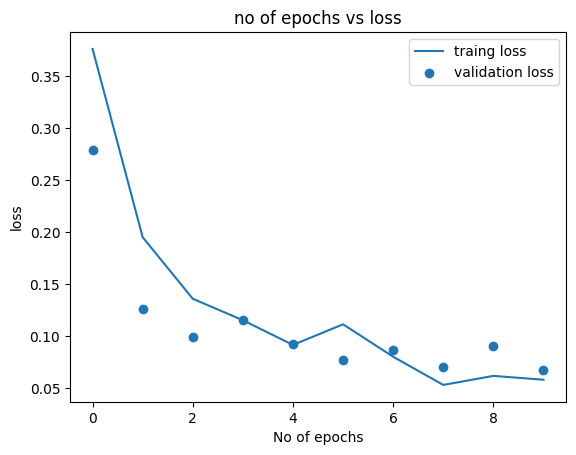

In [21]:
acc=history.history['loss']
epochs_=range(0,epochs)
plt.plot(epochs_, acc,label='traing loss')
plt.xlabel('No of epochs')
plt.ylabel('loss')

acc_val=history.history['val_loss']  ## getting validation loss of each epochs
plt.scatter(epochs_,acc_val,label="validation loss")
plt.title('no of epochs vs loss')
plt.legend()